In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree,DecisionTreeRegressor
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import ValidationCurve
import matplotlib.pyplot as plt
import seaborn as sns

/Users/tanyatonoran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tanyatonoran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
dataset = '/content/drive/MyDrive/Final Project/keypoint model training/csv/keypoint_6mar.csv'

# Load data

In [4]:
column_names = ['hand_sign_id',
    'lm0_x', 'lm0_y', 'lm1_x', 'lm1_y', 'lm2_x', 'lm2_y', 'lm3_x', 'lm3_y',
    'lm4_x', 'lm4_y', 'lm5_x', 'lm5_y', 'lm6_x', 'lm6_y', 'lm7_x', 'lm7_y',
    'lm8_x', 'lm8_y', 'lm9_x', 'lm9_y', 'lm10_x', 'lm10_y', 'lm11_x', 'lm11_y',
    'lm12_x', 'lm12_y', 'lm13_x', 'lm13_y', 'lm14_x', 'lm14_y', 'lm15_x', 'lm15_y',
    'lm16_x', 'lm16_y', 'lm17_x', 'lm17_y', 'lm18_x', 'lm18_y', 'lm19_x', 'lm19_y',
    'lm20_x', 'lm20_y'
]
df = pd.read_csv(dataset, header=None, names=column_names)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Final Project/keypoint model training/csv/keypoint_6mar.csv'

In [ ]:
df.head()

: 

In [5]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

: 

In [8]:
target = np.array(df.hand_sign_id)
x = df.drop(columns=['hand_sign_id'])

#### Preprocess data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [96]:
DT3=DecisionTreeClassifier()
cv = StratifiedKFold(5)
param_val = [{'criterion':['entropy','gini'],'max_depth':[2,7],'min_samples_split':np.arange(2,10,2)}]
#grid search configuration
grid = GridSearchCV(DT3, param_val, cv = cv,scoring='roc_auc_ovr')
#fitting into our data
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'], 'max_depth': [2, 7],
                          'min_samples_split': array([2, 4, 6, 8])}],
             scoring='roc_auc_ovr')

In [97]:
print(grid.best_score_)
print(grid.best_params_)

0.978445411392405
{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': np.int64(6)}


In [98]:
y_pred_2=grid.predict(X_test)
y_pred_2_prob=grid.predict_proba(X_test)
metrics.roc_auc_score(y_test,y_pred_2,multi_class='ovr')

np.float64(0.9720366482153082)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


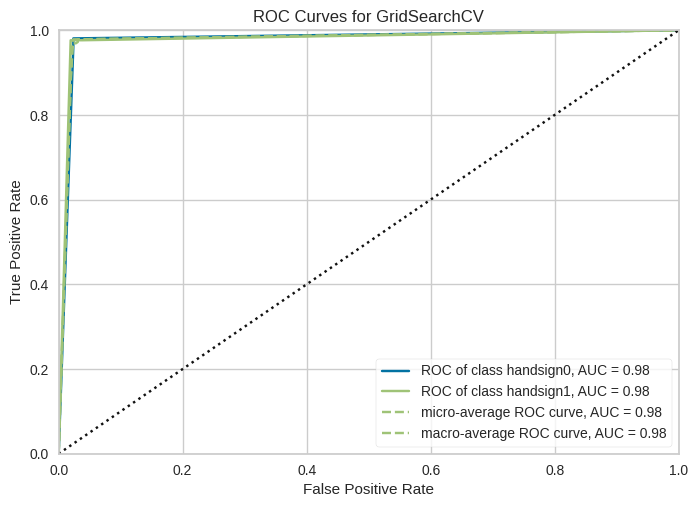

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [99]:
visualizer = ROCAUC(grid, classes=['handsign0', 'handsign1'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test,y_test)        # Evaluate the model on the test data
visualizer.show()

In [100]:
dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_split=int(np.int64(6)),  # Ensure conversion to standard int
    random_state=100
)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=6, random_state=100)

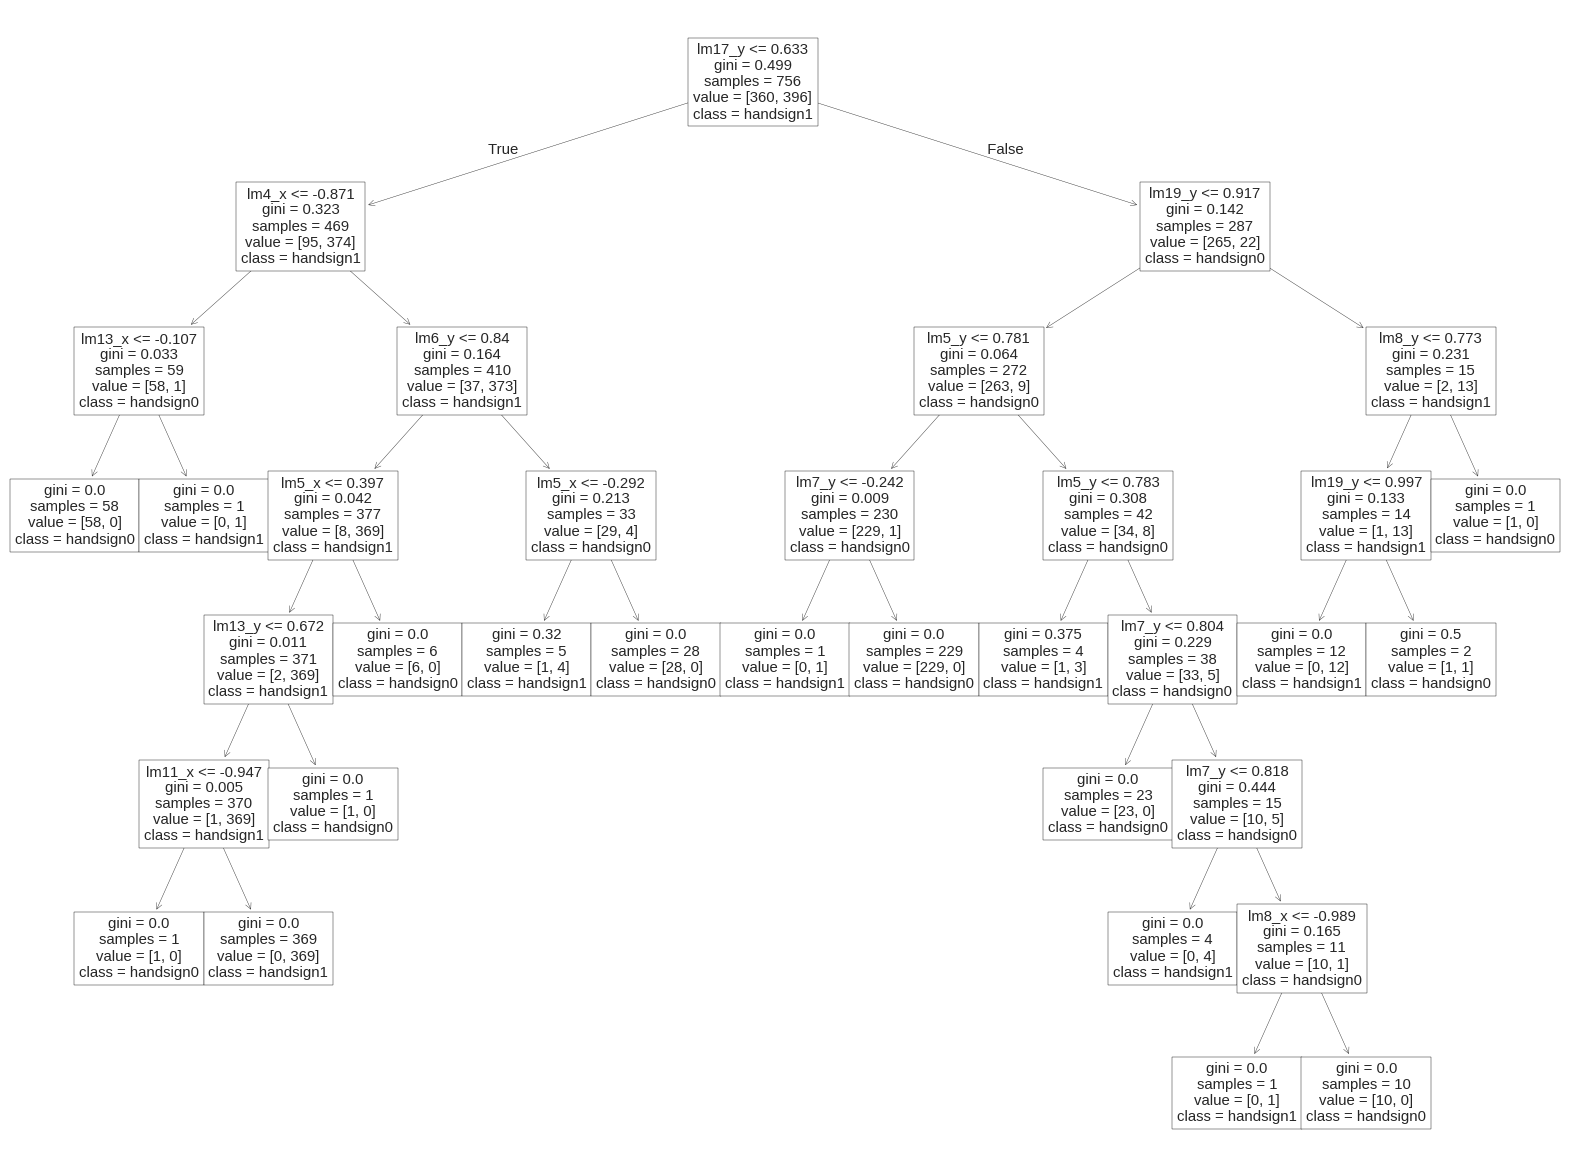

In [101]:
plt.figure(figsize=(20, 15))
plot_tree(dt_clf,feature_names=X_test.columns,class_names=['handsign0', 'handsign1'])
plt.show()


In [102]:
dt_clf.get_depth()

7

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred_new,target_names=['hand0','hand1']),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred_new)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [103]:
import joblib

# Save the trained Decision Tree model
model_path = '/content/drive/MyDrive/Final Project/keypoint model training/other model/keypoint_classifier_dt_24mar_pipeline.pkl'
joblib.dump(dt_clf, model_path)

['/content/drive/MyDrive/Final Project/keypoint model training/other model/keypoint_classifier_dt_24mar_pipeline.pkl']